### read libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold
from matplotlib.colors import ListedColormap

### Piano scores

In [2]:
##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random

# Set a seed for the random module
random.seed(42)

piano_scores_df=pd.read_csv('./dataframes/piano_scores_df.csv')
piano_scores_df=piano_scores_df.drop(index=[2520]).reset_index(drop=True)

# get number of piano scores by composer
scores_by_composer=piano_scores_df['composer_name'].value_counts().reset_index()

# get names of composers with more than 50 scores
composer_names=list(set(scores_by_composer[scores_by_composer['count']>50]['composer_name']))

In [3]:
piano_scores_df.shape

(2673, 12)

In [4]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(piano_scores_df[piano_scores_df['composer_name']==composer].index)

  drop=len(composer_scores)-50

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  piano_scores_df=piano_scores_df.drop(index=composer_scores_drop_samples)

piano_scores_df=piano_scores_df.reset_index(drop=True)

In [5]:
piano_scores_df.shape

(1975, 12)

### 1. Piano scores: split 1

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = piano_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training piano_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = piano_scores_df['composer_name'].isin(train_composer_names)
val_mask = piano_scores_df['composer_name'].isin(val_composer_names)
test_mask = piano_scores_df['composer_name'].isin(test_composer_names)

# Create separate piano_scores_dfFrames for each set
train_piano_scores_df = piano_scores_df[train_mask]
train_piano_scores_df=train_piano_scores_df.explode('piano_scores_paths')

val_piano_scores_df = piano_scores_df[val_mask]
val_piano_scores_df=val_piano_scores_df.explode('piano_scores_paths')

test_piano_scores_df = piano_scores_df[test_mask]
test_piano_scores_df=test_piano_scores_df.explode('piano_scores_paths')


# # Save the resulting piano_scores_dfFrames to CSV files
train_piano_scores_df.to_csv('./dataframes/train_set_1.csv', index=False)
val_piano_scores_df.to_csv('./dataframes/validation_set_1.csv', index=False)
test_piano_scores_df.to_csv('./dataframes/test_set_1.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_piano_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_piano_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_piano_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_piano_scores_df.shape)
print("Validation Gender Proportions:\n", val_piano_scores_df.shape)
print("Test Gender Proportions:\n", test_piano_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (1156, 12)
Validation Gender Proportions:
 (306, 12)
Test Gender Proportions:
 (513, 12)


Train Gender Proportions:
 composer_gender
Male      0.520761
Female    0.479239
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Female    0.660131
Male      0.339869
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Female    0.516569
Male      0.483431
Name: proportion, dtype: float64


### 2. Piano scores: split 2

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = piano_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training piano_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.10, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = piano_scores_df['composer_name'].isin(train_composer_names)
val_mask = piano_scores_df['composer_name'].isin(val_composer_names)
test_mask = piano_scores_df['composer_name'].isin(test_composer_names)

# Create separate piano_scores_dfFrames for each set
train_piano_scores_df = piano_scores_df[train_mask]
train_piano_scores_df=train_piano_scores_df.explode('piano_scores_paths')

val_piano_scores_df = piano_scores_df[val_mask]
val_piano_scores_df=val_piano_scores_df.explode('piano_scores_paths')

test_piano_scores_df = piano_scores_df[test_mask]
test_piano_scores_df=test_piano_scores_df.explode('piano_scores_paths')


# # Save the resulting piano_scores_dfFrames to CSV files
train_piano_scores_df.to_csv('./dataframes/train_set_2.csv', index=False)
val_piano_scores_df.to_csv('./dataframes/validation_set_2.csv', index=False)
test_piano_scores_df.to_csv('./dataframes/test_set_2.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_piano_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_piano_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_piano_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_piano_scores_df.shape)
print("Validation Gender Proportions:\n", val_piano_scores_df.shape)
print("Test Gender Proportions:\n", test_piano_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (1491, 12)
Validation Gender Proportions:
 (114, 12)
Test Gender Proportions:
 (370, 12)


Train Gender Proportions:
 composer_gender
Female    0.518444
Male      0.481556
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.508772
Female    0.491228
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Female    0.518919
Male      0.481081
Name: proportion, dtype: float64


### 3. Piano scores split 3

In [11]:
piano_scores_df=piano_scores_df.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = piano_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training piano_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = piano_scores_df['composer_name'].isin(train_composer_names)
val_mask = piano_scores_df['composer_name'].isin(val_composer_names)
test_mask = piano_scores_df['composer_name'].isin(test_composer_names)

# Create separate piano_scores_dfFrames for each set
train_piano_scores_df = piano_scores_df[train_mask]
train_piano_scores_df=train_piano_scores_df.explode('piano_scores_paths')

val_piano_scores_df = piano_scores_df[val_mask]
val_piano_scores_df=val_piano_scores_df.explode('piano_scores_paths')

test_piano_scores_df = piano_scores_df[test_mask]
test_piano_scores_df=test_piano_scores_df.explode('piano_scores_paths')


# # Save the resulting piano_scores_dfFrames to CSV files
train_piano_scores_df.to_csv('./dataframes/train_set_3.csv', index=False)
val_piano_scores_df.to_csv('./dataframes/validation_set_3.csv', index=False)
test_piano_scores_df.to_csv('./dataframes/test_set_3.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_piano_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_piano_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_piano_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_piano_scores_df.shape)
print("Validation Gender Proportions:\n", val_piano_scores_df.shape)
print("Test Gender Proportions:\n", test_piano_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (1156, 12)
Validation Gender Proportions:
 (306, 12)
Test Gender Proportions:
 (513, 12)


Train Gender Proportions:
 composer_gender
Male      0.520761
Female    0.479239
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Female    0.660131
Male      0.339869
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Female    0.516569
Male      0.483431
Name: proportion, dtype: float64


### Type0 scores

In [3]:
type0_scores=pd.read_csv('../author-profiling-in-symbolic-music/dataframes/type0_scores.csv')

##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random

# Set a seed for the random module
random.seed(42)

# get number of piano scores by composer
scores_by_composer=type0_scores.groupby(by='composer_name')['scores'].max().reset_index().sort_values(by='scores',ascending=False)

# get names of composers with more than 50 scores
composer_names=list(set(scores_by_composer[scores_by_composer['scores']>40]['composer_name']))

type0_scores.shape

In [5]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(type0_scores[type0_scores['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  type0_scores=type0_scores.drop(index=composer_scores_drop_samples)

type0_scores=type0_scores.reset_index(drop=True)

### 4. Type 0 Scores split 1

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = type0_scores.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training type0_scores for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = type0_scores['composer_name'].isin(train_composer_names)
val_mask = type0_scores['composer_name'].isin(val_composer_names)
test_mask = type0_scores['composer_name'].isin(test_composer_names)

# Create separate type0_scoresFrames for each set
train_type0_scores = type0_scores[train_mask]
train_type0_scores=train_type0_scores.explode('type0_path')

val_type0_scores = type0_scores[val_mask]
val_type0_scores=val_type0_scores.explode('type0_path')

test_type0_scores = type0_scores[test_mask]
test_type0_scores=test_type0_scores.explode('type0_path')


# # Save the resulting type0_scoresFrames to CSV files
train_type0_scores.to_csv('./dataframes/type0_train_set.csv', index=False)
val_type0_scores.to_csv('./dataframes/type0_validation_set.csv', index=False)
test_type0_scores.to_csv('./dataframes/type0_test_set.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_type0_scores['composer_gender'].value_counts(normalize=True)
val_description = val_type0_scores['composer_gender'].value_counts(normalize=True)
test_description = test_type0_scores['composer_gender'].value_counts(normalize=True)

print("Train shape:\n", train_type0_scores.shape)
print("Validation shape:\n", val_type0_scores.shape)
print("Test shape:\n", test_type0_scores.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train shape:
 (766, 13)
Validation shape:
 (109, 13)
Test shape:
 (270, 13)


Train Gender Proportions:
 composer_gender
Female    0.560052
Male      0.439948
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.550459
Female    0.449541
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Male      0.548148
Female    0.451852
Name: proportion, dtype: float64


### 5. Type0 split 2

In [20]:
type0_scores=type0_scores.sample(frac=1).reset_index(drop=True)

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = type0_scores.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training type0_scores for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = type0_scores['composer_name'].isin(train_composer_names)
val_mask = type0_scores['composer_name'].isin(val_composer_names)
test_mask = type0_scores['composer_name'].isin(test_composer_names)

# Create separate type0_scoresFrames for each set
train_type0_scores = type0_scores[train_mask]
train_type0_scores=train_type0_scores.explode('type0_path')

val_type0_scores = type0_scores[val_mask]
val_type0_scores=val_type0_scores.explode('type0_path')

test_type0_scores = type0_scores[test_mask]
test_type0_scores=test_type0_scores.explode('type0_path')


# # Save the resulting type0_scoresFrames to CSV files
train_type0_scores.to_csv('./dataframes/type0_train_set_2.csv', index=False)
val_type0_scores.to_csv('./dataframes/type0_validation_set_2.csv', index=False)
test_type0_scores.to_csv('./dataframes/type0_test_set_2.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_type0_scores['composer_gender'].value_counts(normalize=True)
val_description = val_type0_scores['composer_gender'].value_counts(normalize=True)
test_description = test_type0_scores['composer_gender'].value_counts(normalize=True)

print("Train shape:\n", train_type0_scores.shape)
print("Validation shape:\n", val_type0_scores.shape)
print("Test shape:\n", test_type0_scores.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train shape:
 (766, 13)
Validation shape:
 (109, 13)
Test shape:
 (270, 13)


Train Gender Proportions:
 composer_gender
Female    0.560052
Male      0.439948
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.550459
Female    0.449541
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Male      0.548148
Female    0.451852
Name: proportion, dtype: float64


### 6. Merged piano scores

In [7]:
##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random

# Set a seed for the random module
random.seed(42)

piano_merged_scores_df=pd.read_csv('./dataframes/piano_merged_scores.csv')
#piano_merged_scores_df=piano_merged_scores_df.drop(index=[2520]).reset_index(drop=True)

# get number of piano scores by composer
scores_by_composer=piano_merged_scores_df['composer_name'].value_counts().reset_index()

# get names of composers with more than 40 scores
composer_names=list(set(scores_by_composer[scores_by_composer['count']>40]['composer_name']))

piano_merged_scores_df.shape

(1354, 14)

In [8]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(piano_merged_scores_df[piano_merged_scores_df['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  piano_merged_scores_df=piano_merged_scores_df.drop(index=composer_scores_drop_samples)

piano_merged_scores_df=piano_merged_scores_df.reset_index(drop=True)

piano_merged_scores_df.shape

(1145, 14)

In [9]:
piano_merged_scores_df=piano_merged_scores_df.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = piano_merged_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training piano_merged_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = piano_merged_scores_df['composer_name'].isin(train_composer_names)
val_mask = piano_merged_scores_df['composer_name'].isin(val_composer_names)
test_mask = piano_merged_scores_df['composer_name'].isin(test_composer_names)

# Create separate piano_merged_scores_dfFrames for each set
train_piano_merged_scores_df = piano_merged_scores_df[train_mask]
train_piano_merged_scores_df=train_piano_merged_scores_df.explode('piano_scores_paths')

val_piano_merged_scores_df = piano_merged_scores_df[val_mask]
val_piano_merged_scores_df=val_piano_merged_scores_df.explode('piano_scores_paths')

test_piano_merged_scores_df = piano_merged_scores_df[test_mask]
test_piano_merged_scores_df=test_piano_merged_scores_df.explode('piano_scores_paths')


# # Save the resulting piano_merged_scores_dfFrames to CSV files
train_piano_merged_scores_df.to_csv('./train data/piano_merged_scores_train_set.csv', index=False)
val_piano_merged_scores_df.to_csv('./train data/piano_merged_scores_validation_set.csv', index=False)
test_piano_merged_scores_df.to_csv('./train data/piano_merged_scores_test_set.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_piano_merged_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_piano_merged_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_piano_merged_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_piano_merged_scores_df.shape)
print("Validation Gender Proportions:\n", val_piano_merged_scores_df.shape)
print("Test Gender Proportions:\n", test_piano_merged_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (766, 14)
Validation Gender Proportions:
 (109, 14)
Test Gender Proportions:
 (270, 14)


Train Gender Proportions:
 composer_gender
Female    0.560052
Male      0.439948
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.550459
Female    0.449541
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Male      0.548148
Female    0.451852
Name: proportion, dtype: float64


### 7. Piano scores chunks

In [8]:
##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# Set a seed for the random module
random.seed(42)

piano_merged_chunks_scores_df=pd.read_csv('./dataframes/piano_merged_type0_chunks_scores.csv')

#piano_merged_chunks_scores_df=piano_merged_chunks_scores_df.drop(index=[2520]).reset_index(drop=True)

# get number of piano scores by composer
scores_by_composer=piano_merged_chunks_scores_df['composer_name'].value_counts().reset_index()

# get names of composers with more than 80 scores
composer_names=list(set(scores_by_composer[scores_by_composer['count']>80]['composer_name']))

piano_merged_chunks_scores_df.shape

(2708, 15)

In [9]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(piano_merged_chunks_scores_df[piano_merged_chunks_scores_df['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  piano_merged_chunks_scores_df=piano_merged_chunks_scores_df.drop(index=composer_scores_drop_samples)

piano_merged_chunks_scores_df=piano_merged_chunks_scores_df.reset_index(drop=True)

piano_merged_chunks_scores_df.shape

(1970, 15)

In [10]:
piano_merged_chunks_scores_df=piano_merged_chunks_scores_df.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = piano_merged_chunks_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training piano_merged_chunks_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = piano_merged_chunks_scores_df['composer_name'].isin(train_composer_names)
val_mask = piano_merged_chunks_scores_df['composer_name'].isin(val_composer_names)
test_mask = piano_merged_chunks_scores_df['composer_name'].isin(test_composer_names)

# Create separate piano_merged_chunks_scores_dfFrames for each set
train_piano_merged_chunks_scores_df = piano_merged_chunks_scores_df[train_mask]
train_piano_merged_chunks_scores_df=train_piano_merged_chunks_scores_df.explode('piano_scores_paths')

val_piano_merged_chunks_scores_df = piano_merged_chunks_scores_df[val_mask]
val_piano_merged_chunks_scores_df=val_piano_merged_chunks_scores_df.explode('piano_scores_paths')

test_piano_merged_chunks_scores_df = piano_merged_chunks_scores_df[test_mask]
test_piano_merged_chunks_scores_df=test_piano_merged_chunks_scores_df.explode('piano_scores_paths')


# # Save the resulting piano_merged_chunks_scores_dfFrames to CSV files
train_piano_merged_chunks_scores_df.to_csv('./train data/piano_merged_scores_chunks_train_set.csv', index=False)
val_piano_merged_chunks_scores_df.to_csv('./train data/piano_merged_scores_chunks_validation_set.csv', index=False)
test_piano_merged_chunks_scores_df.to_csv('./train data/piano_merged_scores_chunks_test_set.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_piano_merged_chunks_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_piano_merged_chunks_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_piano_merged_chunks_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_piano_merged_chunks_scores_df.shape)
print("Validation Gender Proportions:\n", val_piano_merged_chunks_scores_df.shape)
print("Test Gender Proportions:\n", test_piano_merged_chunks_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (1252, 15)
Validation Gender Proportions:
 (218, 15)
Test Gender Proportions:
 (500, 15)


Train Gender Proportions:
 composer_gender
Female    0.557508
Male      0.442492
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.550459
Female    0.449541
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Male      0.512
Female    0.488
Name: proportion, dtype: float64


### 8. Left hand scores

In [21]:
##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# Set a seed for the random module
random.seed(42)

left_hand_scores_df=pd.read_csv('./dataframes/right_left_hand_scores.csv')

left_hand_scores_df=left_hand_scores_df[~left_hand_scores_df['left_hand_scores_paths'].isna()]
left_hand_scores_df=left_hand_scores_df.reset_index(drop=True)

# get number of piano scores by composer
scores_by_composer=left_hand_scores_df['composer_name'].value_counts().reset_index()

# get names of composers with more than 80 scores
composer_names=list(set(scores_by_composer[scores_by_composer['count']>40]['composer_name']))

left_hand_scores_df.shape

(1332, 14)

In [22]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(left_hand_scores_df[left_hand_scores_df['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  left_hand_scores_df=left_hand_scores_df.drop(index=composer_scores_drop_samples)

left_hand_scores_df=left_hand_scores_df.reset_index(drop=True)

left_hand_scores_df.shape

(1130, 14)

In [23]:
left_hand_scores_df=left_hand_scores_df.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = left_hand_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training left_hand_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = left_hand_scores_df['composer_name'].isin(train_composer_names)
val_mask = left_hand_scores_df['composer_name'].isin(val_composer_names)
test_mask = left_hand_scores_df['composer_name'].isin(test_composer_names)

# Create separate left_hand_scores_dfFrames for each set
train_left_hand_scores_df = left_hand_scores_df[train_mask]
train_left_hand_scores_df=train_left_hand_scores_df.explode('left_hand_scores_paths')

val_left_hand_scores_df = left_hand_scores_df[val_mask]
val_left_hand_scores_df=val_left_hand_scores_df.explode('left_hand_scores_paths')

test_left_hand_scores_df = left_hand_scores_df[test_mask]
test_left_hand_scores_df=test_left_hand_scores_df.explode('left_hand_scores_paths')

#under sample woman
random_women_sample=val_left_hand_scores_df[val_left_hand_scores_df['composer_gender']=="Female"].sample(n=70)
val_left_hand_scores_df=val_left_hand_scores_df[~val_left_hand_scores_df['left_hand_scores_paths'].isin(random_women_sample['left_hand_scores_paths'])]


# # Save the resulting left_hand_scores_dfFrames to CSV files
train_left_hand_scores_df.to_csv('./train data/left_hand_train_set.csv', index=False)
val_left_hand_scores_df.to_csv('./train data/left_hand_validation_set.csv', index=False)
test_left_hand_scores_df.to_csv('./train data/left_hand_test_set.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_left_hand_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_left_hand_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_left_hand_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_left_hand_scores_df.shape)
print("Validation Gender Proportions:\n", val_left_hand_scores_df.shape)
print("Test Gender Proportions:\n", test_left_hand_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (655, 14)
Validation Gender Proportions:
 (102, 14)
Test Gender Proportions:
 (303, 14)


Train Gender Proportions:
 composer_gender
Male      0.528244
Female    0.471756
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.509804
Female    0.490196
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Female    0.514851
Male      0.485149
Name: proportion, dtype: float64


### 9. Right hand scores

In [24]:
##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random
import pandas as pd
from sklearn.model_selection import train_test_split

# Set a seed for the random module
random.seed(42)

right_hand_scores_df=pd.read_csv('./dataframes/right_left_hand_scores.csv')

right_hand_scores_df=right_hand_scores_df[~right_hand_scores_df['right_hand_scores_paths'].isna()]
right_hand_scores_df=right_hand_scores_df.reset_index(drop=True)

# get number of piano scores by composer
scores_by_composer=right_hand_scores_df['composer_name'].value_counts().reset_index()

# get names of composers with more than 40 scores
composer_names=list(set(scores_by_composer[scores_by_composer['count']>40]['composer_name']))

right_hand_scores_df.shape

(1332, 14)

In [26]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(right_hand_scores_df[right_hand_scores_df['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  right_hand_scores_df=right_hand_scores_df.drop(index=composer_scores_drop_samples)

right_hand_scores_df=right_hand_scores_df.reset_index(drop=True)

right_hand_scores_df.shape

(1130, 14)

In [27]:
right_hand_scores_df=right_hand_scores_df.sample(frac=1).reset_index(drop=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Group by composer to get unique composers and their genders
grouped = right_hand_scores_df.groupby('composer_name')
composers = grouped['composer_gender'].first().reset_index()

# Initialize StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)

# Initial split: 80% train, 20% test
train_index, test_index = next(sss.split(composers, composers['composer_gender']))
train_composers = composers.iloc[train_index]
test_composers = composers.iloc[test_index]

# Secondary split: 20% of training right_hand_scores_df for validation
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
train_index, val_index=next(sss.split(train_composers, train_composers['composer_gender']))
final_train_composers = train_composers.iloc[train_index]
val_composers = train_composers.iloc[val_index]

# Extract the names of the composers for each set
train_composer_names = final_train_composers['composer_name']
val_composer_names = val_composers['composer_name']
test_composer_names = test_composers['composer_name']

# Create boolean masks for each set
train_mask = right_hand_scores_df['composer_name'].isin(train_composer_names)
val_mask = right_hand_scores_df['composer_name'].isin(val_composer_names)
test_mask = right_hand_scores_df['composer_name'].isin(test_composer_names)

# Create separate right_hand_scores_dfFrames for each set
train_right_hand_scores_df = right_hand_scores_df[train_mask]
train_right_hand_scores_df=train_right_hand_scores_df.explode('right_hand_scores_paths')

val_right_hand_scores_df = right_hand_scores_df[val_mask]
val_right_hand_scores_df=val_right_hand_scores_df.explode('right_hand_scores_paths')

test_right_hand_scores_df = right_hand_scores_df[test_mask]
test_right_hand_scores_df=test_right_hand_scores_df.explode('right_hand_scores_paths')

#under sample woman
random_women_sample=val_right_hand_scores_df[val_right_hand_scores_df['composer_gender']=="Female"].sample(n=70)
val_right_hand_scores_df=val_right_hand_scores_df[~val_right_hand_scores_df['right_hand_scores_paths'].isin(random_women_sample['right_hand_scores_paths'])]


# # Save the resulting right_hand_scores_dfFrames to CSV files
train_right_hand_scores_df.to_csv('./train data/right_hand_train_set.csv', index=False)
val_right_hand_scores_df.to_csv('./train data/right_hand_validation_set.csv', index=False)
test_right_hand_scores_df.to_csv('./train data/right_hand_test_set.csv', index=False)

# Calculate and display gender proportions for each set
train_description = train_right_hand_scores_df['composer_gender'].value_counts(normalize=True)
val_description = val_right_hand_scores_df['composer_gender'].value_counts(normalize=True)
test_description = test_right_hand_scores_df['composer_gender'].value_counts(normalize=True)

print("Train Gender Proportions:\n", train_right_hand_scores_df.shape)
print("Validation Gender Proportions:\n", val_right_hand_scores_df.shape)
print("Test Gender Proportions:\n", test_right_hand_scores_df.shape)
print('')
print('')

print("Train Gender Proportions:\n", train_description)
print('')
print("Validation Gender Proportions:\n", val_description)
print('')
print("Test Gender Proportions:\n", test_description)

Train Gender Proportions:
 (655, 14)
Validation Gender Proportions:
 (102, 14)
Test Gender Proportions:
 (303, 14)


Train Gender Proportions:
 composer_gender
Male      0.528244
Female    0.471756
Name: proportion, dtype: float64

Validation Gender Proportions:
 composer_gender
Male      0.509804
Female    0.490196
Name: proportion, dtype: float64

Test Gender Proportions:
 composer_gender
Female    0.514851
Male      0.485149
Name: proportion, dtype: float64


### 10. K-folds split

In [2]:
type0_scores=pd.read_csv('./dataframes/type0_scores.csv')

##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random

# Set a seed for the random module
random.seed(42)

# get number of piano scores by composer
scores_by_composer=type0_scores.groupby(by='composer_name')['scores'].max().reset_index().sort_values(by='scores',ascending=False)

# get names of composers with more than 50 scores
composer_names=list(set(scores_by_composer[scores_by_composer['scores']>40]['composer_name']))

type0_scores.shape

(1354, 13)

In [3]:
indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(type0_scores[type0_scores['composer_name']==composer].index)

  drop=len(composer_scores)-40

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  type0_scores=type0_scores.drop(index=composer_scores_drop_samples)

type0_scores=type0_scores.reset_index(drop=True)

type0_scores.shape

(1145, 13)

In [4]:
from sklearn.model_selection import StratifiedGroupKFold
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

sgkf = StratifiedGroupKFold(n_splits=5)

test_dfs = []

full_df=pd.DataFrame([])

# Encoding categorical data
label_enc = LabelEncoder()
type0_scores['composer_gender_encoded'] = label_enc.fit_transform(type0_scores['composer_gender'])
type0_scores['composer_name_encoded'] = label_enc.fit_transform(type0_scores['composer_name'])


for i, (train_index, test_index) in enumerate(sgkf.split(X=type0_scores.name, y=type0_scores.composer_gender, groups=type0_scores.composer_name)):
    
    temp=pd.DataFrame([])
    train_df = type0_scores.loc[train_index]
    train_df['train/test']=0    
    test_df = type0_scores.loc[test_index]
    test_df['train/test']=1
    test_dfs.append(test_df)

    temp=pd.concat([train_df,test_df],axis=0)
    temp['fold']=i
    full_df=pd.concat([full_df,temp],axis=0)
    
    output_path='./train data/k folds/'
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True) 

    #train_df.to_csv(f'{output_path}type0_train_set_k{i+1}.csv')
    #test_df.to_csv(f'{output_path}type0_test_set_k{i+1}.csv')
    
    train_composers = train_df.composer_name.unique()
    test_composers = test_df.composer_name.unique()
    inter = np.intersect1d(train_composers,test_composers)
    print(f"======== Fold {i} =========")
    print(f"  Train: n_songs={len(train_index)}")
    print(f"         n_composers={len(train_composers)}")
    print(train_df.value_counts('composer_gender', normalize=True))
    print(f"  Test: n_songs={len(test_index)}")
    print(f"         n_composers={len(test_composers)}")
    print(train_df.value_counts('composer_gender', normalize=True))
    print(f"Intersection : composers : {inter}")

======== Fold 0 =========
  Train: n_songs=916
         n_composers=86
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
  Test: n_songs=229
         n_composers=21
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 1 =========
  Train: n_songs=916
         n_composers=85
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
  Test: n_songs=229
         n_composers=22
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 2 =========
  Train: n_songs=916
         n_composers=86
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
  Test: n_songs=229
         n_composers=21
composer_gender
Female    0.524017
Male      0.475983
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 3 =========
  Train: n_songs=

#### sorted df

In [24]:
full_df[['composer_gender_encoded','composer_name_encoded','train/test','fold']]

df=full_df[['composer_gender_encoded','composer_name_encoded','train/test','fold']]

df=df.reset_index()

temp=df[['index','composer_gender_encoded','composer_name_encoded']].groupby(by=['index']).max().reset_index()

for fold in range(0,5):
    temp=temp.merge(df[df['fold']==fold][['train/test','fold','index']],how='left',on='index').rename(columns={'train/test':f'train/test_fold{fold}'}).drop(columns=['fold'])

temp.sort_values(by=['composer_gender_encoded','composer_name_encoded']).to_csv('test.csv')

# Step 1: Sort by 'composer_gender_encoded'
df_sorted = temp.sort_values(by='composer_gender_encoded')

# Step 2: Sort within each 'composer_gender_encoded' group
def sort_within_group(group):
    # Sorting train/test columns within the group
    return group.sort_values(by=['train/test_fold0', 'train/test_fold1', 'train/test_fold2', 
                                 'train/test_fold3', 'train/test_fold4'])

# Apply the sorting function within each 'composer_gender_encoded' group
df_sorted = df_sorted.groupby('composer_gender_encoded', group_keys=False).apply(sort_within_group)

# Optionally reset index if needed
df_sorted.reset_index(drop=True, inplace=True)

df_sorted.to_csv('dataframes/cv_sorted_df.csv',index=False)

/tmp/ipykernel_77164/3243264750.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sorted = df_sorted.groupby('composer_gender_encoded', group_keys=False).apply(sort_within_group)


#### cv plot

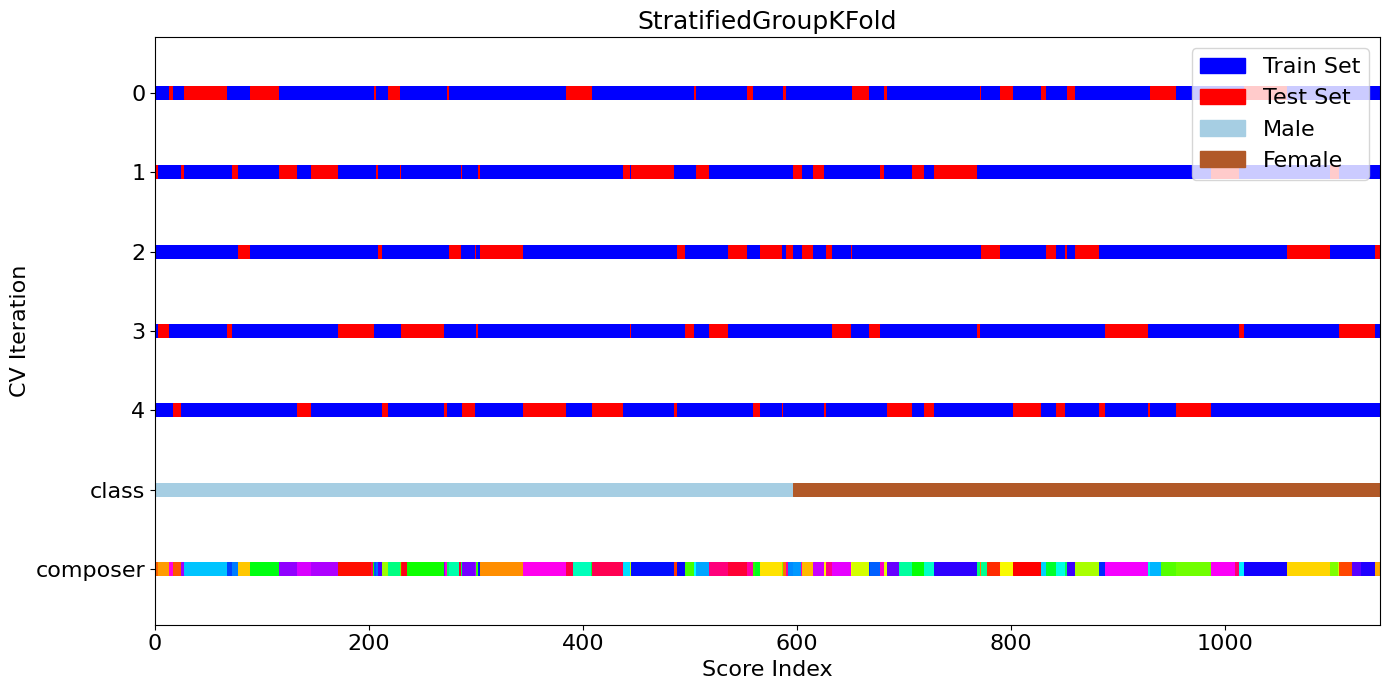

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold
from matplotlib.colors import ListedColormap

# Cross-Validation Setup
sgkf = StratifiedGroupKFold(n_splits=5)

test_dfs = []

for i, (train_index, test_index) in enumerate(sgkf.split(X=type0_scores.name, y=type0_scores.composer_gender, groups=type0_scores.composer_name)):
    
    train_df = type0_scores.loc[train_index]
    test_df = type0_scores.loc[test_index]
    test_dfs.append(test_df)
    
    output_path = './train_data/k_folds/'
    os.makedirs(output_path, exist_ok=True)

    train_composers = train_df.composer_name.unique()
    test_composers = test_df.composer_name.unique()
    inter = np.intersect1d(train_composers, test_composers)


# Encoding categorical data
label_enc = LabelEncoder()
type0_scores['composer_gender_encoded'] = label_enc.fit_transform(type0_scores['composer_gender'])
type0_scores['composer_name_encoded'] = label_enc.fit_transform(type0_scores['composer_name'])

# Generate 107 distinct colors using the 'hsv' colormap and shuffle them
custom_cmap = plt.get_cmap('hsv', 107)
colors = custom_cmap(np.linspace(0, 1, 107))
shuffled_colors = np.random.permutation(colors)

# Visualization of Cross-Validation Splits
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    use_groups = "Group" in type(cv).__name__
    groups = group if use_groups else None

    # Sort by class first, then by group within each class
    sorted_indices = np.lexsort((group, y))
    sorted_X = np.array(X)[sorted_indices]
    sorted_y = np.array(y)[sorted_indices]
    sorted_group = np.array(group)[sorted_indices]

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=sorted_X, y=sorted_y, groups=sorted_group)):

        # Sort the indices within each split
        tr = np.sort(tr)
        tt = np.sort(tt)

        indices = np.array([np.nan] * len(sorted_X))
        indices[tt] = 1
        indices[tr] = 0
        
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=ListedColormap(['blue', 'red']),  # Match colors with the legend
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and composers (formerly "groups") at the end
    ax.scatter(
        range(len(sorted_X)), [ii + 1.5] * len(sorted_X), c=sorted_y, marker="_", lw=lw, cmap=plt.cm.Paired
    )

    ax.scatter(
        range(len(sorted_X)), [ii + 2.5] * len(sorted_X), c=sorted_group, marker="_", lw=lw, cmap=ListedColormap(shuffled_colors)
    )

    yticklabels = list(range(n_splits)) + ["class", "composer"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Score Index",
        ylabel="CV Iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, len(sorted_X)],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=18)
    ax.set_xlabel("Score Index", fontsize=16)
    ax.set_ylabel("CV Iteration", fontsize=16)

    # Customize tick parameters
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Add a manual legend for the CV iterations and class
    handles = [
        Patch(color='blue', label='Train Set'),
        Patch(color='red', label='Test Set'),
        Patch(color=plt.cm.Paired(0.0), label='Male'),
        Patch(color=plt.cm.Paired(1.0), label='Female')
    ]
    ax.legend(handles=handles, loc='upper right', fontsize=16)

    return ax


# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
plot_cv_indices(sgkf, 
                X=type0_scores.name, 
                y=type0_scores['composer_gender_encoded'], 
                group=type0_scores['composer_name_encoded'], 
                ax=ax, 
                n_splits=5)

plt.tight_layout()

# Save the plot as an SVG file
#output_svg_path = 'cv_plot.svg'
#fig.savefig(output_svg_path, format='svg')

plt.show()


#### sorted cv plot

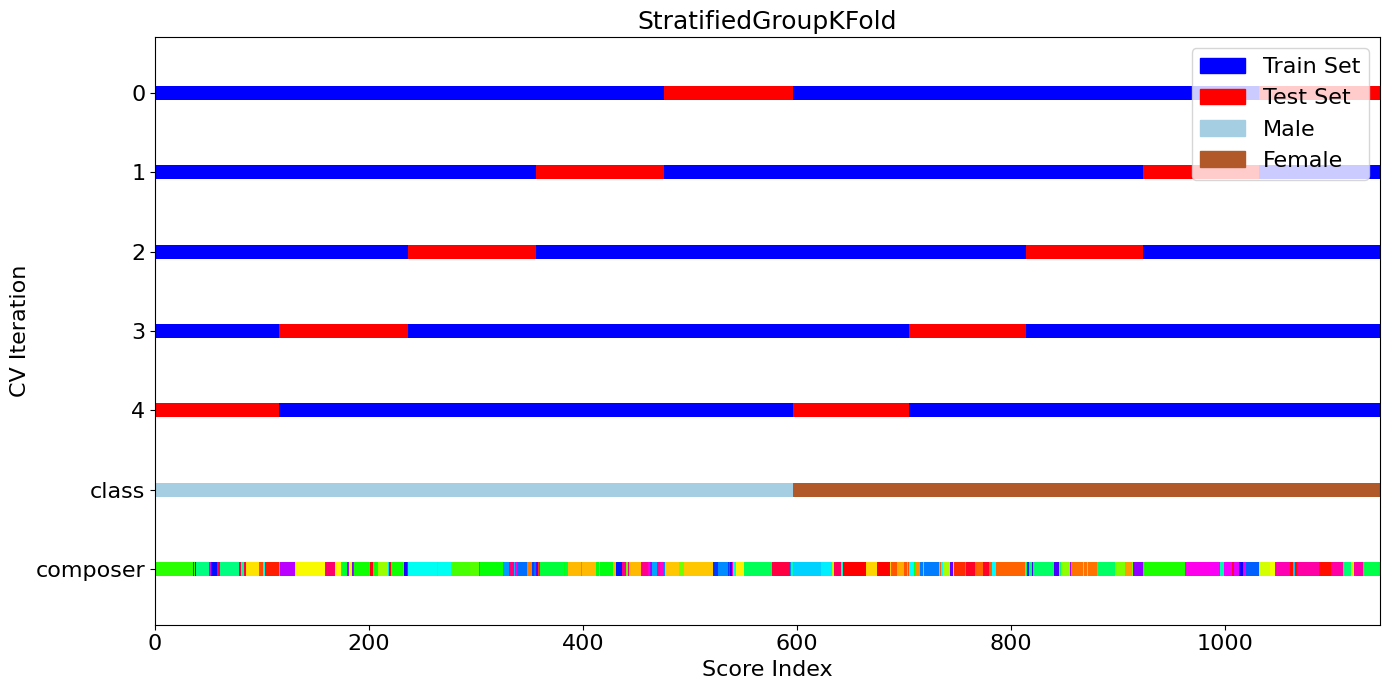

In [15]:
df_sorted=pd.read_csv('dataframes/cv_sorted_df.csv')
# Generate 107 distinct colors using the 'hsv' colormap and shuffle them
custom_cmap = plt.get_cmap('hsv', 107)
colors = custom_cmap(np.linspace(0, 1, 107))
shuffled_colors = np.random.permutation(colors)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))    
lw=10
cv=sgkf 
X=type0_scores.name
y=type0_scores['composer_gender_encoded']
group=type0_scores['composer_name_encoded']
ax=ax
n_splits=5

# Generate the training/testing visualizations for each CV split
for ii,i in enumerate(['train/test_fold0','train/test_fold1','train/test_fold2','train/test_fold3','train/test_fold4']):

    
    ax.scatter(
        range(len(df_sorted[i])),
        [ii + 0.5] * len(df_sorted[i]),
        c=df_sorted[i],
        marker="_",
        lw=lw,
        cmap=ListedColormap(['blue', 'red']),  # Match colors with the legend
        vmin=-0.2,
        vmax=1.2,
    )

# Plot the data classes and composers (formerly "groups") at the end
ax.scatter(
    range(len(df_sorted['index'])), [ii + 1.5] * len(X), c=df_sorted['composer_gender_encoded'], marker="_", lw=lw, cmap=plt.cm.Paired
)

ax.scatter(
    range(len(df_sorted['index'])), [ii + 2.5] * len(X), c=df_sorted['composer_name_encoded'], marker="_", lw=lw, cmap=ListedColormap(shuffled_colors)
)

n_splits=5
yticklabels = list(range(n_splits)) + ["class", "composer"]
ax.set(
    yticks=np.arange(n_splits + 2) + 0.5,
    yticklabels=yticklabels,
    xlabel="Score Index",
    ylabel="CV Iteration",
    ylim=[n_splits + 2.2, -0.2],
    xlim=[0, len(df_sorted['index'])],
)
ax.set_title("{}".format(type(cv).__name__), fontsize=18)
ax.set_xlabel("Score Index", fontsize=16)
ax.set_ylabel("CV Iteration", fontsize=16)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=16)

# Add a manual legend for the CV iterations and class
handles = [
    Patch(color='blue', label='Train Set'),
    Patch(color='red', label='Test Set'),
    Patch(color=plt.cm.Paired(0.0), label='Male'),
    Patch(color=plt.cm.Paired(1.0), label='Female')
]
ax.legend(handles=handles, loc='upper right', fontsize=16)

#    return ax
plt.tight_layout()

# Save the plot as an SVG file
output_svg_path = 'cv_plot.pdf'
fig.savefig(output_svg_path, format='pdf')

plt.show()

#### single split

In [5]:
train=pd.read_csv('./train data/type0_train_set_2.csv')
train['set_type']=0

val=pd.read_csv('./train data/type0_validation_set_2.csv')
val['set_type']=1

test=pd.read_csv('./train data/type0_test_set_2.csv')
test['set_type']=2

type0_single_split=pd.concat([train,val,test])

# Encoding categorical data
label_enc = LabelEncoder()
type0_single_split['composer_gender_encoded'] = label_enc.fit_transform(type0_single_split['composer_gender'])
type0_single_split['composer_name_encoded'] = label_enc.fit_transform(type0_single_split['composer_name'])

df=type0_single_split[['composer_gender_encoded','composer_name_encoded','set_type']]

df=df.reset_index()

# Step 1: Sort by 'composer_gender_encoded'
df_sorted_single_split = df.sort_values(by=['set_type','composer_gender_encoded','composer_name_encoded'])

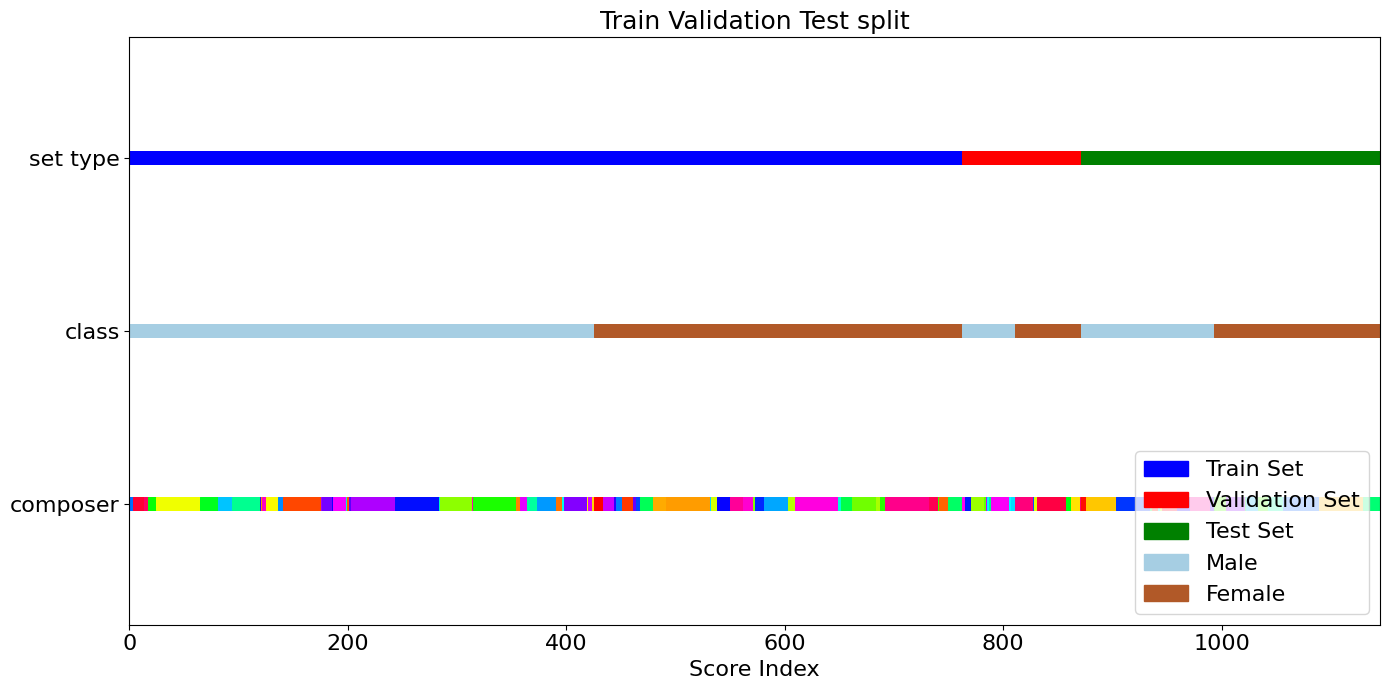

In [8]:
# Generate 107 distinct colors using the 'hsv' colormap and shuffle them
custom_cmap = plt.get_cmap('hsv', 107)
colors = custom_cmap(np.linspace(0, 1, 107))
shuffled_colors = np.random.permutation(colors)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))    
lw=10
cv=sgkf 
X=type0_scores.name
y=type0_scores['composer_gender_encoded']
group=type0_scores['composer_name_encoded']
ax=ax
n_splits=1

# Generate the training/testing visualizations for each CV split
for ii,i in enumerate(['set_type']):
    
    ax.scatter(
        range(len(df_sorted_single_split[i])),
        [ii + 0.5] * len(df_sorted_single_split[i]),
        c=df_sorted_single_split[i],
        marker="_",
        lw=lw,
        cmap=ListedColormap(['blue', 'red', 'green'])# Match colors with the legend

    )

# Plot the data classes and composers (formerly "groups") at the end
ax.scatter(
    range(len(df_sorted_single_split['index'])), [ii + 1.5] * len(X), c=df_sorted_single_split['composer_gender_encoded'], marker="_", lw=lw, cmap=plt.cm.Paired
)

ax.scatter(
    range(len(df_sorted_single_split['index'])), [ii + 2.5] * len(X), c=df_sorted_single_split['composer_name_encoded'], marker="_", lw=lw, cmap=ListedColormap(shuffled_colors)
)


yticklabels = ["set type","class", "composer"]
ax.set(
    yticks=np.arange(n_splits + 2) + 0.5,
    yticklabels=yticklabels,
    xlabel="Score Index",    
    ylim=[n_splits + 2.2, -0.2],
    xlim=[0, len(df_sorted_single_split['index'])],
)
ax.set_title("Train Validation Test split", fontsize=18)
ax.set_xlabel("Score Index", fontsize=16)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=16)

# Add a manual legend for the CV iterations and class
handles = [
    Patch(color='blue', label='Train Set'),
    Patch(color='red', label='Validation Set'),
    Patch(color='green', label='Test Set'),
    Patch(color=plt.cm.Paired(0.0), label='Male'),
    Patch(color=plt.cm.Paired(1.0), label='Female')
]

ax.legend(handles=handles, loc='lower right', fontsize=16)

# Save the plot as an pdf file
output_pdf_path = 'single_split_plot.pdf'
fig.savefig(output_pdf_path, format='pdf')

plt.tight_layout()

plt.show()

### 11. Giant-midi + type0

In [2]:
type0_scores=pd.read_csv('../author-profiling/dataframes/type0_scores.csv')

##===========UNDERSAMPLE COMPOSERS WITH A LOT OF SCORES=====##
import random

# Set a seed for the random module
random.seed(42)

# get number of piano scores by composer
scores_by_composer=type0_scores.groupby(by='composer_name')['scores'].max().reset_index().sort_values(by='scores',ascending=False)

threshold=30
# get names of composers with more than 50 scores
composer_names=list(set(scores_by_composer[scores_by_composer['scores']>threshold]['composer_name']))

print(type0_scores.shape)

indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(type0_scores[type0_scores['composer_name']==composer].index)

  drop=len(composer_scores)-threshold

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  type0_scores=type0_scores.drop(index=composer_scores_drop_samples)

type0_scores=type0_scores.reset_index(drop=True)

print(type0_scores.shape)

(1354, 13)
(1056, 13)


In [3]:
giant_midi_scores=pd.read_csv('./dataframes/giant_midi_scores.csv')
giant_midi_scores.rename(columns={'fullname':'composer_name'},inplace=True)

# Set a seed for the random module
random.seed(42)

# get number of piano scores by composer
scores_by_composer=giant_midi_scores.groupby(by='composer_name')['name'].count().reset_index().sort_values(by='name',ascending=False)

threshold=30
# get names of composers with more than 50 scores
composer_names=list(set(scores_by_composer[scores_by_composer['name']>threshold]['composer_name']))

print(giant_midi_scores.shape)

indexes_to_drop=[]

for composer in composer_names:

  composer_scores=list(giant_midi_scores[giant_midi_scores['composer_name']==composer].index)

  drop=len(composer_scores)-threshold

  composer_scores_drop_samples=random.sample(composer_scores,drop)

  indexes_to_drop.append(composer_scores_drop_samples)

  giant_midi_scores=giant_midi_scores.drop(index=composer_scores_drop_samples)

giant_midi_scores=giant_midi_scores.reset_index(drop=True)

print(giant_midi_scores.shape)

(1026, 4)
(884, 4)


In [4]:
import pandas as pd
import shutil
import os


# Define the destination folder
destination_folder = './train data/giant midi/'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over each row in the DataFrame
for index, row in giant_midi_scores.iterrows():
    source_path = '../giant-midi/midis/'+row['path']
    file_name = os.path.basename(source_path)
    destination_path = os.path.join(destination_folder, file_name)
    
    # Copy the file to the destination folder
    shutil.copy(source_path, destination_path)

print(f"giant midi files chosen copied in folder")


giant midi files chosen copied in folder


In [6]:
giant_midi_plus_type0=pd.concat([type0_scores,giant_midi_scores])

giant_midi_plus_type0=giant_midi_plus_type0[['composer_name','composer_gender','name','path', 'set_id', 'composer_path',
                        'desc', 'sets', 'scores', 'scores_paths',
                        'track_names', 'contains_piano_track?', 'type0_path']]

giant_midi_plus_type0['composer_gender']=giant_midi_plus_type0['composer_gender'].apply(lambda x: x.lower())

giant_midi_plus_type0.reset_index(inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold
from matplotlib.colors import ListedColormap

# Cross-Validation Setup
sgkf = StratifiedGroupKFold(n_splits=5)

test_dfs = []

for i, (train_index, test_index) in enumerate(sgkf.split(X=type0_scores.name, y=type0_scores.composer_gender, groups=type0_scores.composer_name)):
    
    train_df = type0_scores.loc[train_index]
    test_df = type0_scores.loc[test_index]
    test_dfs.append(test_df)
    
    output_path = './train_data/k_folds/'
    os.makedirs(output_path, exist_ok=True)

    train_composers = train_df.composer_name.unique()
    test_composers = test_df.composer_name.unique()
    inter = np.intersect1d(train_composers, test_composers)


# Encoding categorical data
label_enc = LabelEncoder()
type0_scores['composer_gender_encoded'] = label_enc.fit_transform(type0_scores['composer_gender'])
type0_scores['composer_name_encoded'] = label_enc.fit_transform(type0_scores['composer_name'])

# Generate 107 distinct colors using the 'hsv' colormap and shuffle them
custom_cmap = plt.get_cmap('hsv', 107)
colors = custom_cmap(np.linspace(0, 1, 107))
shuffled_colors = np.random.permutation(colors)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

    
cv=sgkf 
X=type0_scores.name 
y=type0_scores['composer_gender_encoded'] 
group=type0_scores['composer_name_encoded'] 
ax=ax 
n_splits=5
lw=10
# Visualization of Cross-Validation Splits
#def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
use_groups = "Group" in type(cv).__name__
groups = group if use_groups else None



# Generate the training/testing visualizations for each CV split
for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):

    # Sort the indices within each split
    tr = np.sort(tr)
    tt = np.sort(tt)

    indices = np.array([np.nan] * len(X))
    indices[tt] = 1
    indices[tr] = 0

    ax.scatter(
        range(len(indices)),
        [ii + 0.5] * len(indices),
        c=indices,
        marker="_",
        lw=lw,
        cmap=ListedColormap(['blue', 'red']),  # Match colors with the legend
        vmin=-0.2,
        vmax=1.2,
    )

# Sort by class first, then by group within each class
sorted_indices = np.lexsort((group, y))
sorted_X = np.array(X)[sorted_indices]
sorted_y = np.array(y)[sorted_indices]
sorted_group = np.array(group)[sorted_indices]


# Plot the data classes and composers (formerly "groups") at the end
ax.scatter(
    range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=plt.cm.Paired
)

ax.scatter(
    range(len(X)), [ii + 2.5] * len(X), c=groups, marker="_", lw=lw, cmap=ListedColormap(shuffled_colors)
)

yticklabels = list(range(n_splits)) + ["class", "composer"]
ax.set(
    yticks=np.arange(n_splits + 2) + 0.5,
    yticklabels=yticklabels,
    xlabel="Score Index",
    ylabel="CV Iteration",
    ylim=[n_splits + 2.2, -0.2],
    xlim=[0, len(X)],
)
ax.set_title("{}".format(type(cv).__name__), fontsize=18)
ax.set_xlabel("Score Index", fontsize=16)
ax.set_ylabel("CV Iteration", fontsize=16)

# Customize tick parameters
ax.tick_params(axis='both', which='major', labelsize=16)

# Add a manual legend for the CV iterations and class
handles = [
    Patch(color='blue', label='Train Set'),
    Patch(color='red', label='Test Set'),
    Patch(color=plt.cm.Paired(0.0), label='Male'),
    Patch(color=plt.cm.Paired(1.0), label='Female')
]
ax.legend(handles=handles, loc='upper right', fontsize=16)

#    return ax




plt.tight_layout()

# Save the plot as an SVG file
#output_svg_path = 'cv_plot.svg'
#fig.savefig(output_svg_path, format='svg')

plt.show()


In [10]:
giant_midi_plus_type0['type0_path'] = giant_midi_plus_type0['type0_path'].fillna('../../train data/giant midi/' + giant_midi_plus_type0['path'])

giant_midi_plus_type0

,index,composer_name,composer_gender,name,path,set_id,composer_path,desc,sets,scores,scores_paths,track_names,contains_piano_track?,type0_path
0,0,Jane Bingham Abbott,female,Just for Today,"Abbott,_Jane_Bingham/_/Just_for_Today",5106766.0,"Abbott,_Jane_Bingham","US pianist, singer and composer",1.0,2.0,"../Lieder/scores/Abbott,_Jane_Bingham/_/Just_f...","['voice', 'piano', 'piano']",True,../author-profiling-in-symbolic-music/type 0 m...
1,1,Jane Bingham Abbott,female,Think of Today,"Abbott,_Jane_Bingham/_/Think_of_Today",5106766.0,"Abbott,_Jane_Bingham","US pianist, singer and composer",1.0,2.0,"../Lieder/scores/Abbott,_Jane_Bingham/_/Think_...","['voice', 'piano', 'piano']",True,../author-profiling-in-symbolic-music/type 0 m...
2,2,Harriett Abrams,female,Crazy Jane,"Abrams,_Harriett/_/Crazy_Jane",5106769.0,"Abrams,_Harriett","English musician, singer, composer",1.0,2.0,"../Lieder/scores/Abrams,_Harriett/_/Crazy_Jane...","['voice', 'piano', 'piano']",True,../author-profiling-in-symbolic-music/type 0 m...
3,3,Harriett Abrams,female,The Orphan’s Prayer,"Abrams,_Harriett/_/The_Orphan’s_Prayer",5106769.0,"Abrams,_Harriett","English musician, singer, composer",1.0,2.0,"../Lieder/scores/Abrams,_Harriett/_/The_Orphan...","['voice', 'piano', 'piano']",True,../author-profiling-in-symbolic-music/type 0 m...
4,4,Granville Bantock,male,The Old Fisherman of the Mists and Waters,"Bantock,_Granville/5_Songs_from_the_Chinese_Po...",5103566.0,"Bantock,_Granville",British composer and conductor,1.0,5.0,"../Lieder/scores/Bantock,_Granville/5_Songs_fr...","['voice', 'piano', 'piano']",True,../author-profiling-in-symbolic-music/type 0 m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,879,Helen Hopekirk,female,Romance in A minor,"Hopekirk, Helen, Romance in A minor, GBgNA019F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"../../train data/giant midi/Hopekirk, Helen, R..."
1936,880,Elaine Fine,female,Obsequy for Trombone and Piano,"Fine, Elaine, Obsequy for Trombone and Piano, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"../../train data/giant midi/Fine, Elaine, Obse..."
1937,881,Clara Kathleen Rogers,female,Op.15,"Rogers, Clara Kathleen, Scherzo, Op.15, -05HSt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"../../train data/giant midi/Rogers, Clara Kath..."
1938,882,Andrea Turchetto,female,Intermezzo in E major,"Turchetto, Andrea, Intermezzo in E major, hkzV...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"../../train data/giant midi/Turchetto, Andrea,..."


In [11]:
from sklearn.model_selection import StratifiedGroupKFold
import os
import numpy as np

sgkf = StratifiedGroupKFold(n_splits=5)

test_dfs = []

for i, (train_index, test_index) in enumerate(sgkf.split(X=giant_midi_plus_type0.name, y=giant_midi_plus_type0.composer_gender, groups=giant_midi_plus_type0.composer_name)):
    
    train_df = giant_midi_plus_type0.loc[train_index]
    test_df = giant_midi_plus_type0.loc[test_index]
    test_dfs.append(test_df)
    
    output_path='./train data/k-folds_giant-midi_type0/'
    output_dir = os.path.dirname(output_path)
    os.makedirs(output_dir, exist_ok=True) 

    train_df.to_csv(f'{output_path}giant-midi_type0_train_set_k{i+1}.csv')
    test_df.to_csv(f'{output_path}giant-midi_type0_test_set_k{i+1}.csv')
    
    train_composers = train_df.composer_name.unique()
    test_composers = test_df.composer_name.unique()
    inter = np.intersect1d(train_composers,test_composers)
    print(f"======== Fold {i} =========")
    print(f"  Train: n_songs={len(train_index)}")
    print(f"         n_composers={len(train_composers)}")
    print(train_df.value_counts('composer_gender', normalize=True))
    print(f"  Test: n_songs={len(test_index)}")
    print(f"         n_composers={len(test_composers)}")
    print(train_df.value_counts('composer_gender', normalize=True))
    print(f"Intersection : composers : {inter}")

======== Fold 0 =========
  Train: n_songs=1552
         n_composers=314
composer_gender
female    0.531572
male      0.468428
Name: proportion, dtype: float64
  Test: n_songs=388
         n_composers=77
composer_gender
female    0.531572
male      0.468428
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 1 =========
  Train: n_songs=1552
         n_composers=313
composer_gender
female    0.531572
male      0.468428
Name: proportion, dtype: float64
  Test: n_songs=388
         n_composers=78
composer_gender
female    0.531572
male      0.468428
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 2 =========
  Train: n_songs=1552
         n_composers=313
composer_gender
female    0.530928
male      0.469072
Name: proportion, dtype: float64
  Test: n_songs=388
         n_composers=78
composer_gender
female    0.530928
male      0.469072
Name: proportion, dtype: float64
Intersection : composers : []
======== Fold 3 =========
  Train: n_